# Import the necessary libraries and data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
s=pd.read_csv('survey.csv')

# EDA

## Basic EDA

In [4]:
def dataoverview(df, message):
    print(f'{message}:')
    print('\nInfo: ')
    print(df.info())
    print('\nDescribe: ')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of features: ', df.shape[1])
    print('\nFeatures: ')
    print(df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique values: ')
    print(df.nunique())
    dups = df.duplicated()
    print("Duplicate Rows",df[dups])
    plt.figure(figsize=(10,12))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
dataoverview(s, 'A Overview about the survey dataset')

A Overview about the survey dataset:
5 first rows: 
             Timestamp  Age  Gender         Country     state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States        IL            No   
1  2014-08-27 11:29:37   44    Male   United States        IN            No   
2  2014-08-27 11:29:44   32    Male          Canada  No State            No   
3  2014-08-27 11:29:46   31    Male  United Kingdom  No State            No   
4  2014-08-27 11:30:22   31    Male   United States        TX            No   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0

## Cleaning Data

In [6]:
columns_to_fill = {
    'self_employed': s['self_employed'].mode()[0],
    'work_interfere': s['work_interfere'].mode()[0]
}

for column, value in columns_to_fill.items():
    if column in s.columns:
        s[column].fillna(value, inplace=True)

s.drop(columns=['comments'], inplace=True)

def clean_gender(gender):
    gender = str(gender).strip().lower()
    male_keywords = ['male', 'm', 'man', 'cis male', 'male-ish', 'msle', 'mail', 'mal', 'make', 'cis man']
    female_keywords = ['female', 'f', 'woman', 'cis female', 'female ', 'femake', 'cis-female/femme']
    trans_keywords = ['trans-female', 'trans woman', 'female (trans)', 'female (cis)']
    non_binary_keywords = ['non-binary', 'genderqueer', 'androgyne', 'agender', 'enby', 'fluid']
    
    if gender in male_keywords:
        return 'Male'
    elif gender in female_keywords:
        return 'Female'
    elif gender in trans_keywords:
        return 'Trans Female'
    elif gender in non_binary_keywords:
        return 'Non-binary'
    else:
        return 'Other/Prefer not to say'

s['Gender'] = s['Gender'].apply(clean_gender)

no_employees_mapping = {
    '1-5': 'Small',
    '6-25': 'Small-Medium',
    '26-100': 'Medium',
    '100-500': 'Large',
    '500-1000': 'Very Large',
    'More than 1000': 'Enterprise'
}
s['employee_category'] = s['no_employees'].map(no_employees_mapping)
s['state']=s['state'].fillna('No State')
s = s[(s['Age'] >= 0) & (s['Age'] <= 100)]

## Visualization features

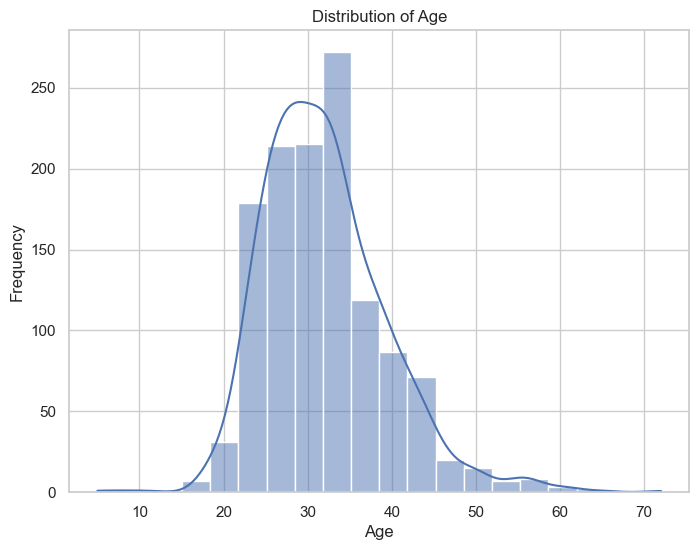

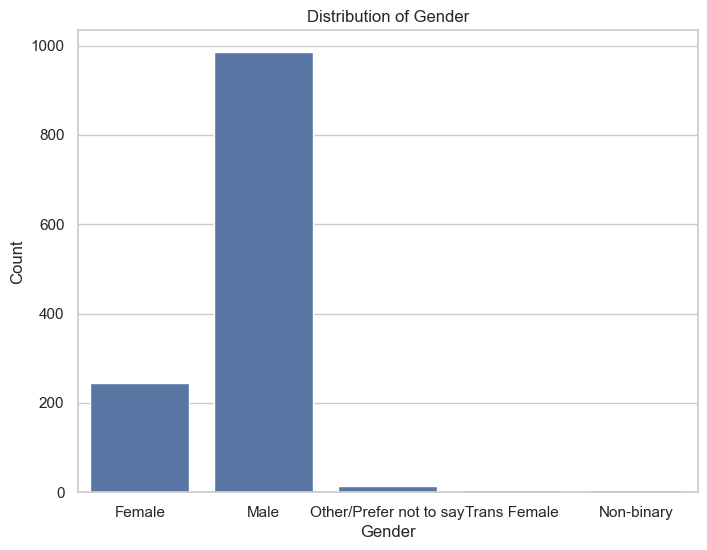

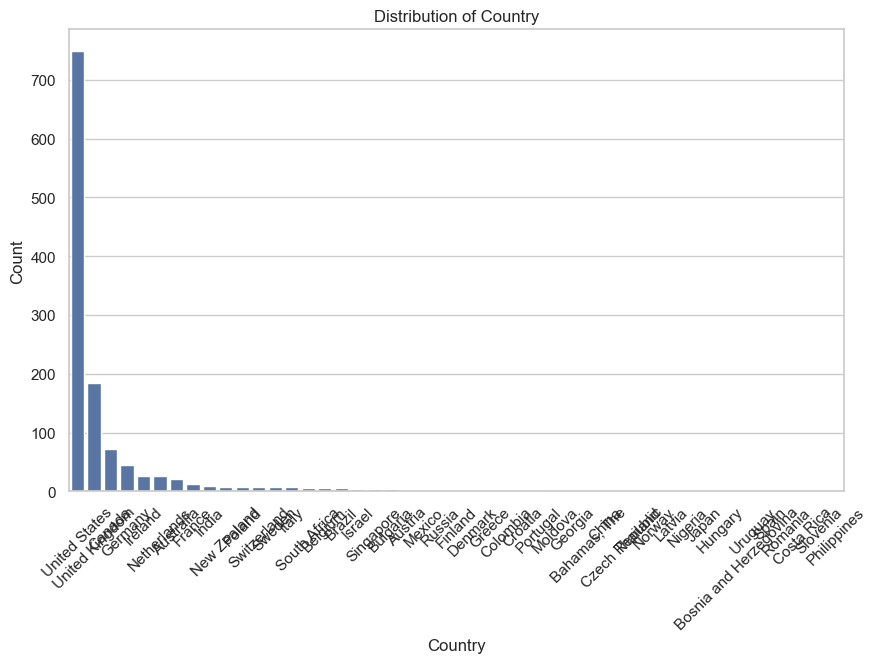

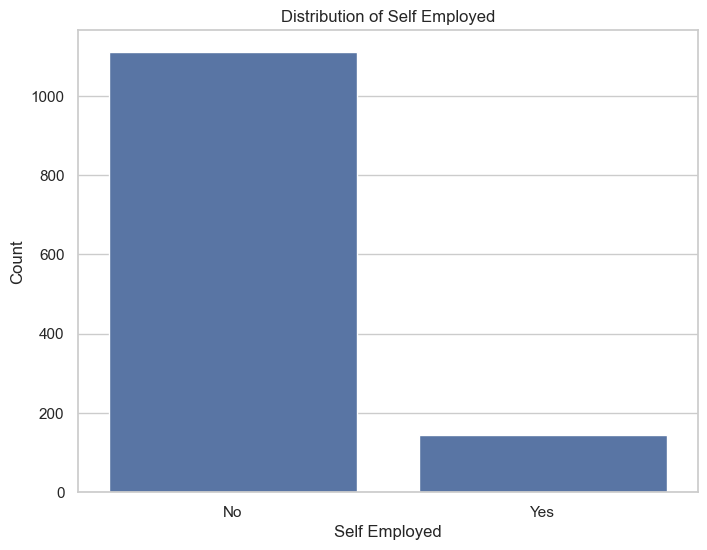

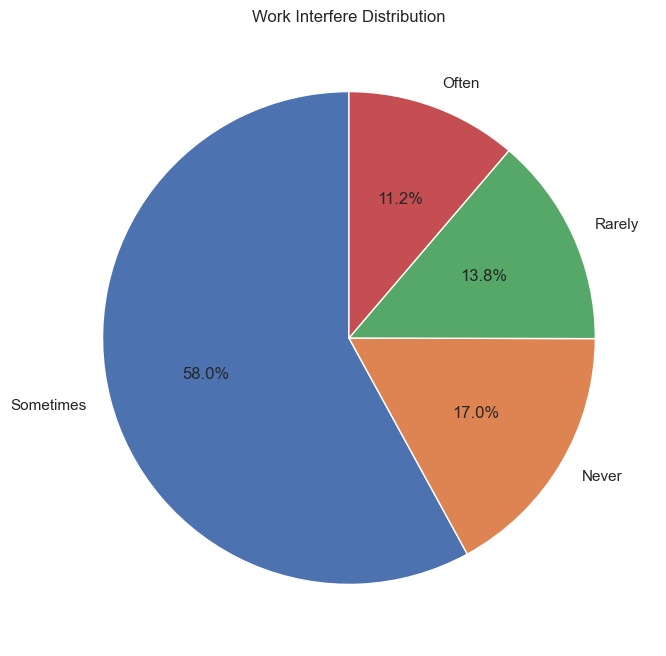

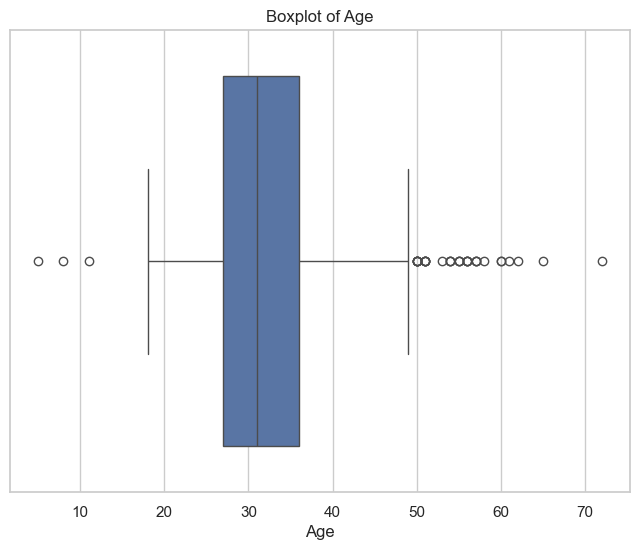

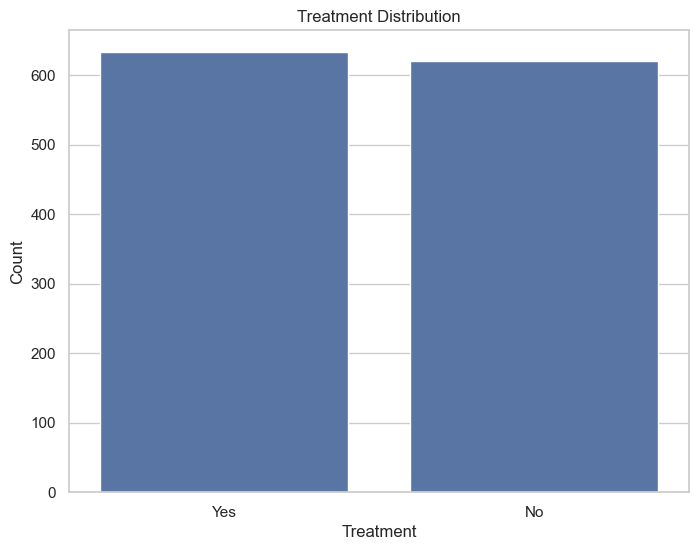

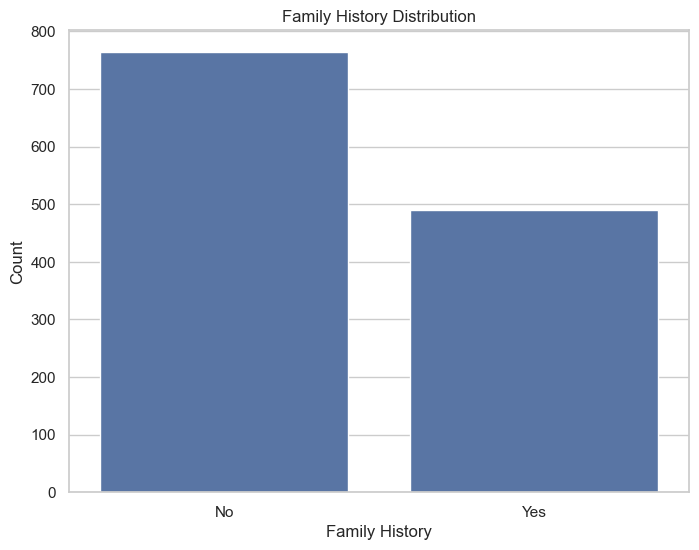

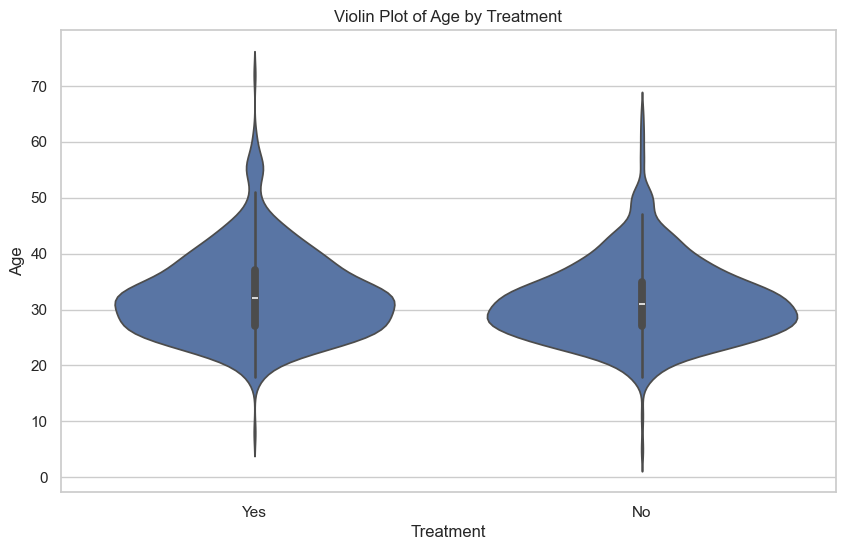

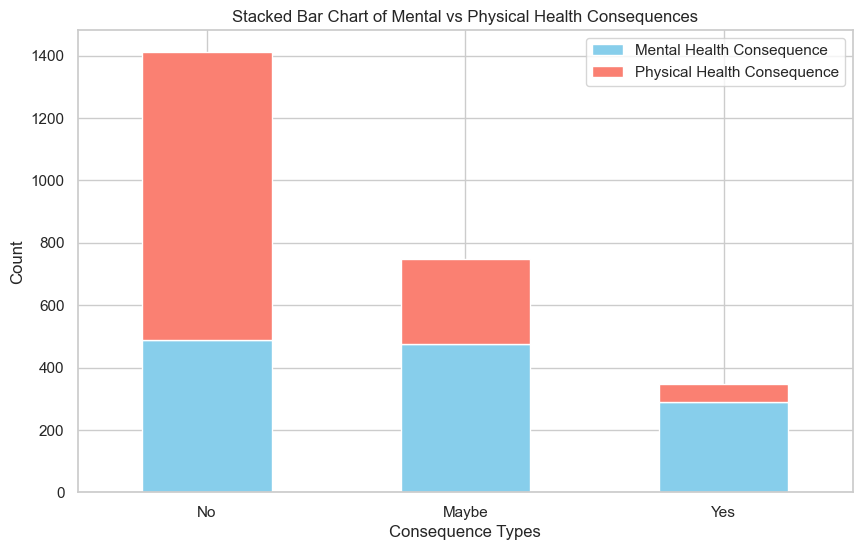

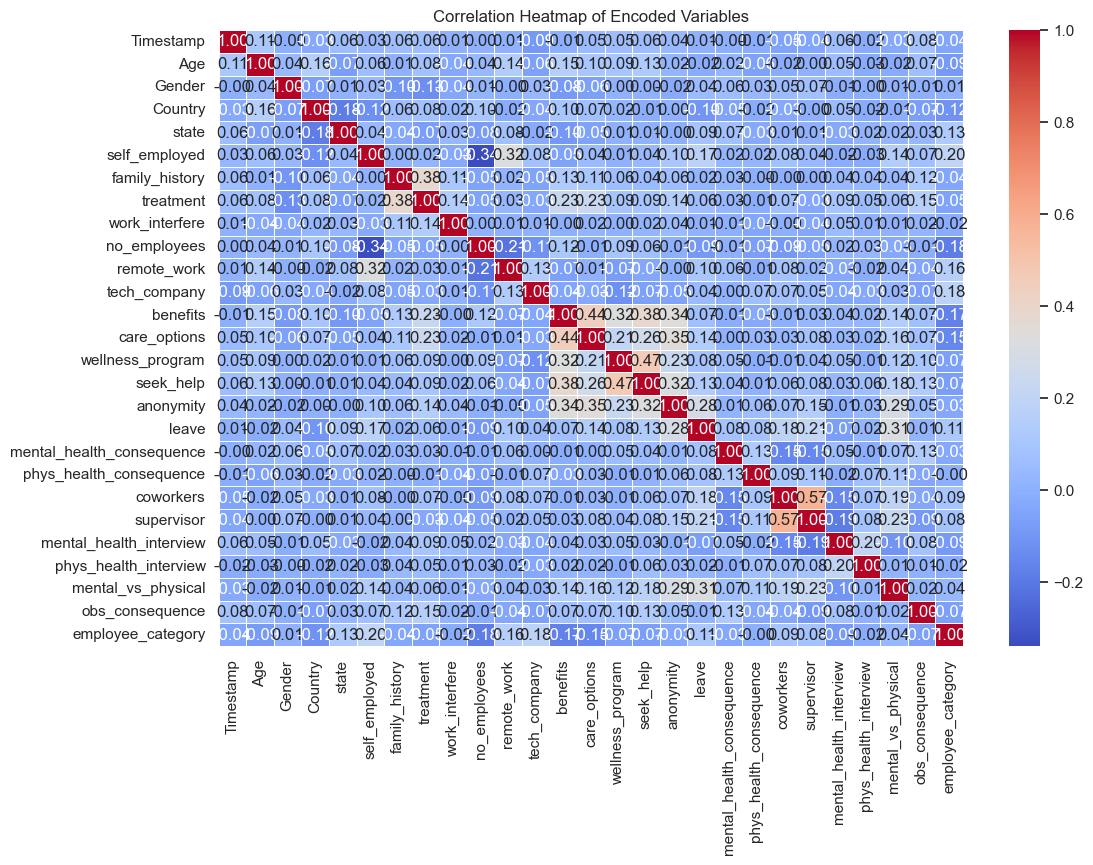

In [7]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Distribution of 'Age' (numeric column)
plt.figure(figsize=(8, 6))
sns.histplot(s['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of 'Gender' (categorical column)
plt.figure(figsize=(8, 6))
sns.countplot(data=s, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 3. Distribution of 'Country' (categorical column)
plt.figure(figsize=(10, 6))
sns.countplot(data=s, x='Country', order=s['Country'].value_counts().index)
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Distribution of 'self_employed' (categorical column)
plt.figure(figsize=(8, 6))
sns.countplot(data=s, x='self_employed')
plt.title('Distribution of Self Employed')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

# 5. Pie chart for 'work_interfere' (categorical column)
plt.figure(figsize=(8, 8))
s['work_interfere'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Work Interfere Distribution')
plt.ylabel('')
plt.show()

# 6. Boxplot for 'Age' to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=s, x='Age')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# 7. Bar Plot for 'Treatment' (categorical column)
plt.figure(figsize=(8, 6))
sns.countplot(data=s, x='treatment')
plt.title('Treatment Distribution')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()

# 8. Countplot for 'Family History'
plt.figure(figsize=(8, 6))
sns.countplot(data=s, x='family_history')
plt.title('Family History Distribution')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

# 9. Violin Plot for Age vs Treatment (to compare the distribution of Age for different treatments)
plt.figure(figsize=(10, 6))
sns.violinplot(data=s, x='treatment', y='Age')
plt.title('Violin Plot of Age by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Age')
plt.show()

# 10. Stacked Bar Chart for Mental Health and Physical Health Consequences
# This will require aggregation of counts
mental_health_conseq = s['mental_health_consequence'].value_counts()
phys_health_conseq = s['phys_health_consequence'].value_counts()

# Create DataFrame for the stacked bar chart
stacked_df = pd.DataFrame({
    'Mental Health Consequence': mental_health_conseq,
    'Physical Health Consequence': phys_health_conseq
}).fillna(0)

# Plot the stacked bar chart
stacked_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Stacked Bar Chart of Mental vs Physical Health Consequences')
plt.xlabel('Consequence Types')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 11. Correlation Heatmap (after encoding categorical variables)
# You can convert categorical data to numeric using Label Encoding or One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
le = LabelEncoder()
encoded_df = s.copy()
for col in s.select_dtypes(include=['object']).columns:
    encoded_df[col] = le.fit_transform(s[col])

# Generate correlation matrix
corr_matrix = encoded_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Encoded Variables')
plt.show()



# Save Data

In [9]:
s.to_csv('survey_cleaned.csv', index=False)